<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW2_Winner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.models import Sequential
from scipy.misc import toimage
from keras.layers import Dense, Activation, Flatten,Conv2D,MaxPooling2D,Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

#use of Learning rate scheduler to avoid overfitting
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10 
(X_train_original, y_train_original), (X_test_original, y_test_original) = cifar10.load_data()


In [0]:
#OneHotEncoding
y_train = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)
#Using Z-Score as the normalization
X_train = X_train_original.astype('float32')
X_test = X_test_original.astype('float32')

mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#Weight Decay 
w_decay = 0.0001

**Description**  
Kernel_regularizer  which allows to apply penalties on layer parameters during optimization. weights will decay after a while   
Activation = ELU &  
Batch Normalization   
ELU is far better than Relu since the model will underfit    
Dropout and Batch normalization will further improve the model

![alt text](https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same',
                 kernel_regularizer=regularizers.l2(w_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=0.000001)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

model.summary()

 
 


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2

In [0]:
#data Augmentation 3 {Winner}
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [0]:
def learning(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

The learning rate should increase after epoch 75 

In [6]:
#batch size 64 gives the best result following by 128 which results in below 89%
batch_size = 64
epochs = 200
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=epochs,verbose=1,validation_data=[X_test,y_test],,callbacks=[LearningRateScheduler(lr_schedule)])
                              
score = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print("\n Test score: ", score[0])
print("\nTest accuracy: ", score[1]*100)


Instructions for updating:
Use tf.cast instead.
Epoch 1/200
781/781 [==============================] - 42s 54ms/step - loss: 1.8880 - acc: 0.4323 - val_loss: 1.2502 - val_acc: 0.5933
Epoch 2/200
781/781 [==============================] - 39s 50ms/step - loss: 1.2926 - acc: 0.5923 - val_loss: 0.9751 - val_acc: 0.6908
Epoch 3/200
781/781 [==============================] - 42s 53ms/step - loss: 1.0953 - acc: 0.6546 - val_loss: 1.2760 - val_acc: 0.6416
Epoch 4/200
781/781 [==============================] - 42s 53ms/step - loss: 0.9950 - acc: 0.6895 - val_loss: 0.8984 - val_acc: 0.7307
Epoch 5/200
781/781 [==============================] - 42s 53ms/step - loss: 0.9238 - acc: 0.7142 - val_loss: 0.8961 - val_acc: 0.7403
Epoch 6/200
781/781 [==============================] - 41s 53ms/step - loss: 0.8826 - acc: 0.7317 - val_loss: 0.8437 - val_acc: 0.7552
Epoch 7/200
781/781 [==============================] - 42s 54ms/step - loss: 0.8478 - acc: 0.7433 - val_loss: 0.7527 - val_acc: 0.7825
Epoch 8

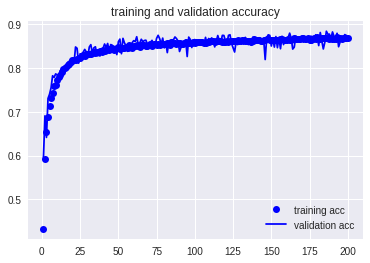

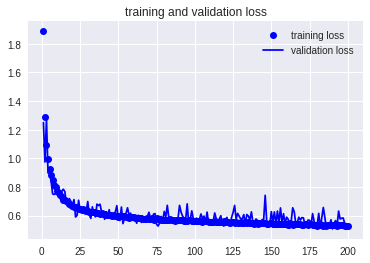

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

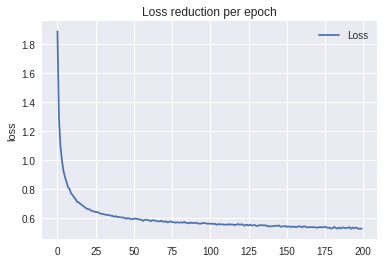

In [8]:
history_dict = history.history
loss_values = history_dict['loss']

plt.figure(1)
plt.plot(loss_values, label='Loss')
# plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper right')
plt.title('Loss reduction per epoch')
plt.ylabel('loss') 
plt.show()
